<a href="https://colab.research.google.com/github/thiagolopes97/Portifolio_Projetos/blob/main/Analisando_os_Dados_do_Airbnb_(Roma%2C_It%C3%A1lia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/thiagolopes97/Portifolio_Projetos/main/Imagem/roma_airbnb.png">

#### **Primeiro Projeto Realizado no Data Science na Prática 2.0**
*by [Thiago Gonçalves Guimarães Lopes](https://github.com/thiagolopes97/Portifolio_Projetos)*

---

# Análise dos Dados do Airbnb - Roma, Itália

O [Airbnb](https://www.airbnb.com.br/) (Air, Bed and Breakfast) é um serviço digital que possibilita as pessoas do mundo inteiro ofereçam suas casas para usuários que buscam acomodações em suas viagens. 

Essa ideia fez com que a empresa seja considerado como a **maior companhia hoteleira da atualidade**. Ah, um pequeno detalhe, eles **não possuem nenhum hotel!**. Além de fornecer uma opção de hospedagem, a plataforma também proporciona passeios, experiências e atividades na região.

<center><img alt="Analisando Airbnb" width="35%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Mas agora vamos falar um pouco mais sobre os números da empresa. Fundada em 2008, o Airbnb tinha, e ainda tem, a missão de conectar as pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática e rápida. No final 2019 já haviam **hospedado mais de 500 milhões** de pessoas ao redor do globo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

Neste breve **notebook**, me proponho a uma análise exploratória simples de dados da fintech para a cidade de Roma na Itália. Tentando encontrar alguns insights que podem ser extraídos destes dados brutos. Para isso, utilizarei os dados disponibilizados pela própria empresa por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) para alguns dos principais destinos turísticos do mundo.

# A cidade de Roma



## Obtenção dos Dados

Os dados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Um iniciativa da empresa em disponibilizar dados brutos sobre os 

Neste projeto, foi utilizado somente o arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rome (good for visualisations)..*


In [67]:
# Importação das Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [68]:
# Importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2020-12-17/visualisations/listings.csv")

## Análise dos Dados

A primeira etapa de qualquer projeto de Data Science, seja a criação de um modelo de Machine Learning ou apenas um análise gráfica de dados é entender o significado dos dados obtidos e como ele se organiza.

**Dicionário das variáveis**

* `id` - Número de id do imóvel
* `name` - Nome do imóvel anunciado
* `host_id` - Número de id do proprietário (anfitrião)
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Esta coluna não apresenta nenhuma informação
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Tipo de quarto que é oferecido
* `price` - Preço para alugar o imóvel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews que a propriedade possui no app
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Quantidade de dias disponíveis em um ano.

Antes de aplicar qualquer método, vamos analisar 5 entradas aleatórias do nosso dataset.

In [69]:
# Mostrando 5 entradas aleatórias do nosso conjunto de dados

df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10865,16557994,L' Angolo Rossano Appartamento Roma,109034806,Alessandra,NaN,VII San Giovanni/Cinecittà,41.88633,12.52029,Entire home/apt,120,30,2,2017-08-10,0.05,2,344
26728,44429136,"L'orLand, Basic Double Room",358820726,Majid,NaN,I Centro Storico,41.91392,12.46255,Private room,61,1,4,2020-09-10,1.06,2,180
6888,9441751,Trastevere: E. De Pimentel,39679443,Valeria,NaN,I Centro Storico,41.89005,12.46885,Entire home/apt,130,2,3,2018-10-22,0.05,11,163
8604,12296149,Attico panoramico. Wonderful penthouse apartment.,53601197,Francesco,NaN,III Monte Sacro,41.93871,12.53793,Entire home/apt,65,180,0,NaN,NaN,1,358
11793,18149645,NEW LIFE ROMA NICE,115174816,Valentina,NaN,XI Arvalia/Portuense,41.86984,12.46422,Private room,18,20,13,2019-11-21,0.29,8,365


### **Q1. Quantos atributos (variáveis) e quantas amostras o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Pela rápida análise acima, ja é possível perceber que tem algumas variáveis que são apenas números inteiros (*int*), o endereço (*strings*), valores numéricos decimais (*floats*) e e outras valores ausentes (*NaN*). 

Este *dataset* que baixamos é a versão "resumida" do Airbnb, normalmente utilizada apenas para uma análise visual dos dados. Há uma versão mais completa disponível com 106 variáveis (`listings.csv.gz`).

O próximo passo agora é analisar quantitativamente o nosso *dataset*.

In [70]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

Entradas:	 28151
Variáveis:	 16



In [71]:
# Definir quais são as variáveis e seus tipos dentro do Dataset
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Quantos valores nulos ou formatados de maneira incorreta estão presentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos ou totalmente inúteis comparados ao total de entradas.

Do caso do nosso *dataset*, têm-se que:
* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 23% dos dados.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [72]:
# Porcentagem de valores ausentes no dataset
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.226706
last_review                       0.226706
host_name                         0.000391
name                              0.000249
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Primeiro vamos analisar as variáveis numéricas relevantes para nossa análise.

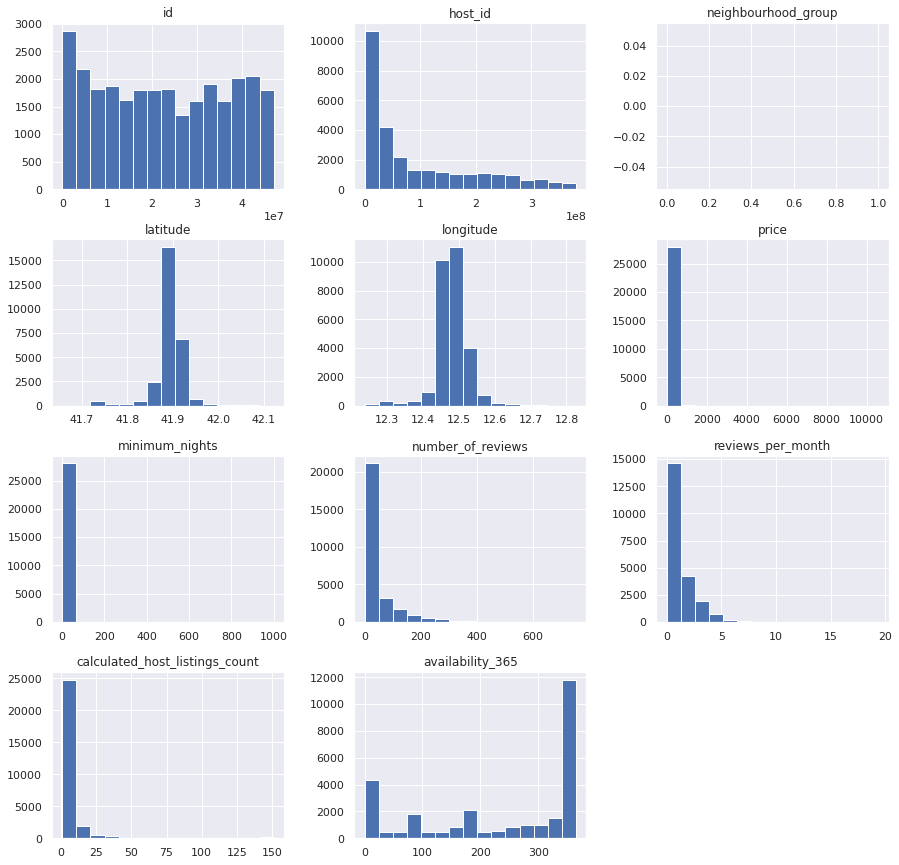

In [73]:
# Plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,15));

Essa visualização primária nos permite ter uma noção geral dos dados mas não a sua completude. Mas por que? 

Isso ocorre devido a presença de *Outliers*, que são valores muito maiores que tendem a não seguir o padrão dos dados. Mais para frente iremos analisar esses valores sem os *outliers*.

Agora, vamos avaliar algumas variáveis categóricas.

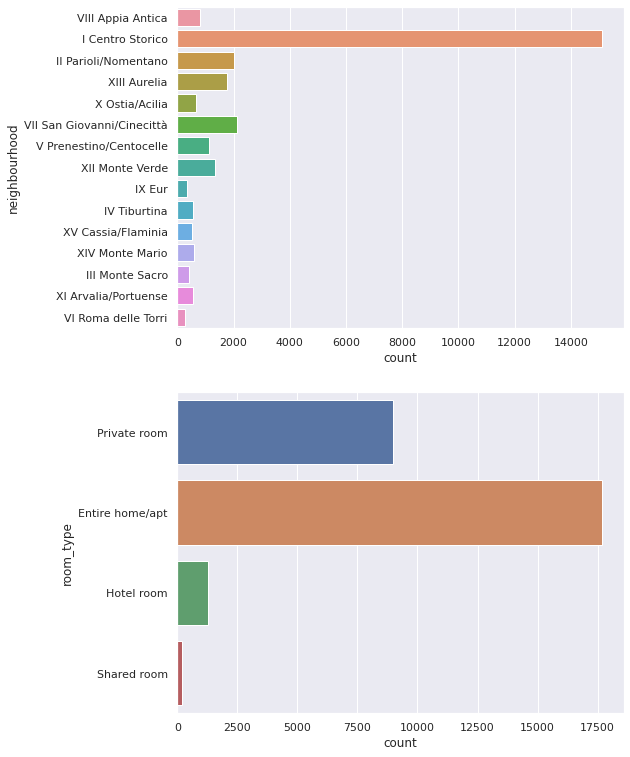

In [74]:
plt.figure(figsize=(8,13))
sns.set(font_scale=1.0)

plt.subplot(2,1,1)
sns.countplot(y='neighbourhood',data=df)

plt.subplot(2,1,2)
sns.countplot(y='room_type',data=df);

Como pode-se ver acima, a grande maioria dos imóveis oferecidos no Airbnb em Roma estão localizados no *I Centro Storico* sendo mais comum as pessoas oferecerem um quarto privado (*Private Room*) ou todo o imóvel (*Entire home/ apt*).

Agora vamos remover os *outlier* para podermos analisar melhor os outros dados.

### **Q4. O que são os outliers e como eles influenciam nossa análise?**


Um *outlier* nada mais é do que dados ou exemplos que estão muito fora do padrão, que não representam a real grandeza dos dados. Olhe a imagem abaixo como exemplo. Os dados expostos em vermelho não seguem a mesma classe ou mesmas características do grupo em verde.

<center><img alt="Exemplo Outlier" width="55%" src="https://datascience.foundation/img/pdf_images/knowing_all_about_outliers_in_machine_learning_sample_points_in_green_are_near_to_each_other.jpg"></center>

Quando analisamos agora valores numéricos, esses extremos tendem a alterar significativamente a nossa análise, pois estes tendem a mudar a média/ desvio padrão e outras informações estatísticas importantes.

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Tomemos como exemplo as `price`, `minimum_nights` e `calculated_host_listings_count`.

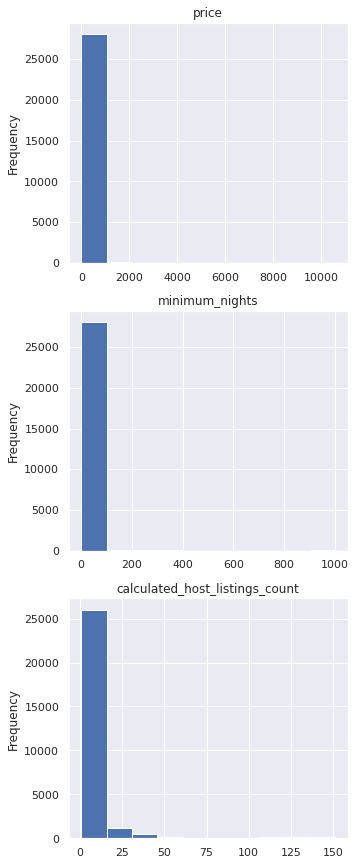

In [75]:
plt.figure(figsize=(5,15))
sns.set(font_scale=1.0)

plt.subplot(3,1,1)
df['price'].plot(kind='hist');
plt.title('price')


plt.subplot(3,1,2)
df['minimum_nights'].plot(kind='hist')
plt.title('minimum_nights')

plt.subplot(3,1,3)
df['calculated_host_listings_count'].plot(kind= 'hist')
plt.title('calculated_host_listings_count');


Com estes gráficos, não tem como inferir quase nada. Os valores não seguem uma distruição e por causa do valor extremo que "puxa" o gráfico para valores altos, a análise gráfica fica toda distorcida e incorreta. 

Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [76]:
# Análise estatística das variáveis numéricas
# Para facilitar, vamos criar uma nova variável
df_num = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']]
df_num.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,28151.000000,28151.000000,28151.000000,21769.000000,28151.000000,28151.000000
mean,108.706760,3.361834,40.817591,1.149521,6.597172,234.941174
std,322.280649,15.989722,69.634285,1.278964,16.343341,138.716651
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,48.000000,1.000000,1.000000,0.190000,1.000000,92.000000
50%,70.000000,2.000000,9.000000,0.670000,2.000000,295.000000
75%,104.000000,3.000000,51.000000,1.710000,5.000000,363.000000
max,10571.000000,1000.000000,753.000000,19.330000,151.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 104, porém seu valor máximo é 10571.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.
* O número de casas por anfitrião (`calculated_host_listing_count`) é em média 6 imóveis, entretanto, o seu máximo é 151.


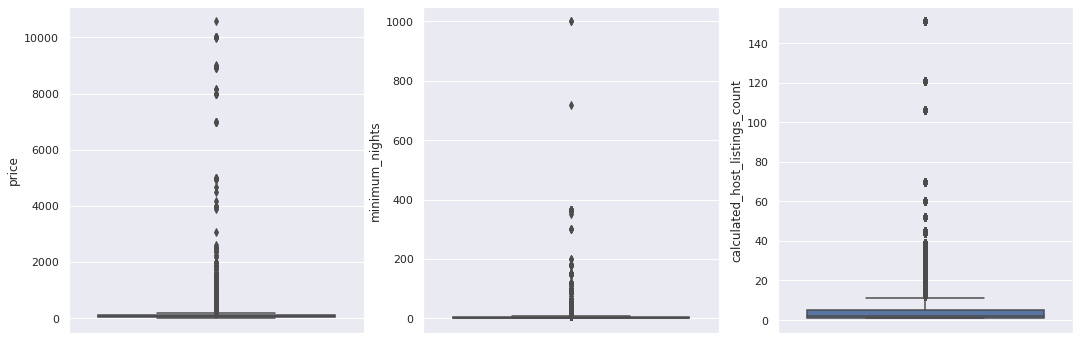

In [77]:
plt.figure(figsize=(18,6))
sns.set(font_scale=1.0)

plt.subplot(1,3,1)
sns.boxplot(y = 'price',data=df_num)

plt.subplot(1,3,2)
sns.boxplot(y = 'minimum_nights',data=df_num)

plt.subplot(1,3,3)
sns.boxplot(y = 'calculated_host_listings_count',data=df_num)


Como podemos ver da análise `boxplot` alguns valores que estão muito elevados, porém a grande maioria dos dados estão muito abaixo destes.

Vamos dar uma analisada melhor na quantidade mínica de noites por exemplo. O número de casos onde têm-se que alugar o imóvel por mais de 30 dias não é nem 1% dos dados analisados.

In [78]:
# Vamos analisar quantos dados apresentam minimum_nights para diferentes valores
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

minimum_nights: valores acima de 30:
191 entradas
0.6785%


Para a variável `price`, tomando como limiar 1500, tem apenas 68 entradas com estes valores. Isto corresponde ainda menos do *dataset*.

In [79]:
# Agora, analisando o price para diferentes valores
print("price: valores acima de 1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

price: valores acima de 1500:
68 entradas
0.2416%


#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

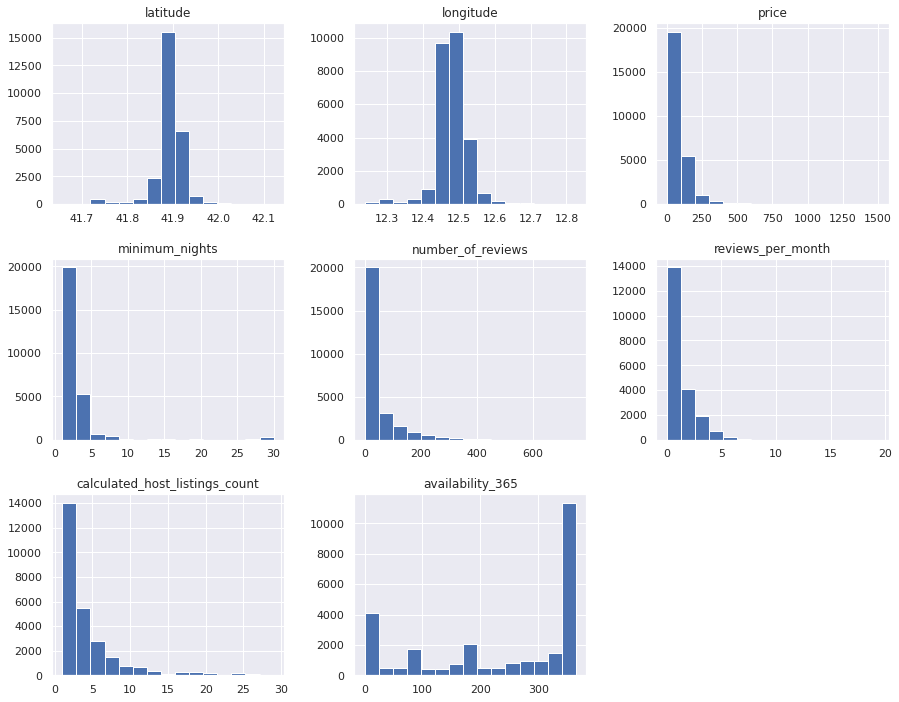

In [80]:
# Removendo os *outliers* e valores nulos em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 30].index, axis=0, inplace=True)
df_clean.drop('neighbourhood_group',axis=1,inplace=True) # Só aprenseta valores nulos
df_clean.drop(['id','host_id'],axis=1,inplace=True) # É utilizado somente para cadastro, não representa nada fisicamente

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,12));

Mais ainda, na seção de Conlusão iremos analisar melhor estes valores com gráficos mais detalhados.

### **Q5. Qual a correlação existente entre as variáveis**

<center><img alt="Correlação" width="300%" src="https://www.mathsisfun.com/data/images/correlation-examples.svg">

Correlação significa que existe uma relação entre duas coisas, no nosso caso entre duas variáveis. Neste contexto, buscamos descobrir se exiteste alguma semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Este coeficiente varia de -1 a 1, como ilustrado na figura acima.

Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [81]:
# criar uma matriz de correlação
corr = df_clean.corr()

display(corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.257911,0.064854,-0.017372,0.015382,0.029532,0.062259,0.030774
longitude,0.257911,1.000000,-0.052575,0.015083,0.024101,0.037002,0.004453,-0.024952
price,0.064854,-0.052575,1.000000,-0.014394,-0.066570,-0.069389,0.078911,0.048796
minimum_nights,-0.017372,0.015083,-0.014394,1.000000,-0.034186,-0.059639,-0.046594,-0.031238
number_of_reviews,0.015382,0.024101,-0.066570,-0.034186,1.000000,0.840971,-0.031335,0.027475
reviews_per_month,0.029532,0.037002,-0.069389,-0.059639,0.840971,1.000000,-0.001334,0.016272
calculated_host_listings_count,0.062259,0.004453,0.078911,-0.046594,-0.031335,-0.001334,1.000000,0.088702
availability_365,0.030774,-0.024952,0.048796,-0.031238,0.027475,0.016272,0.088702,1.000000


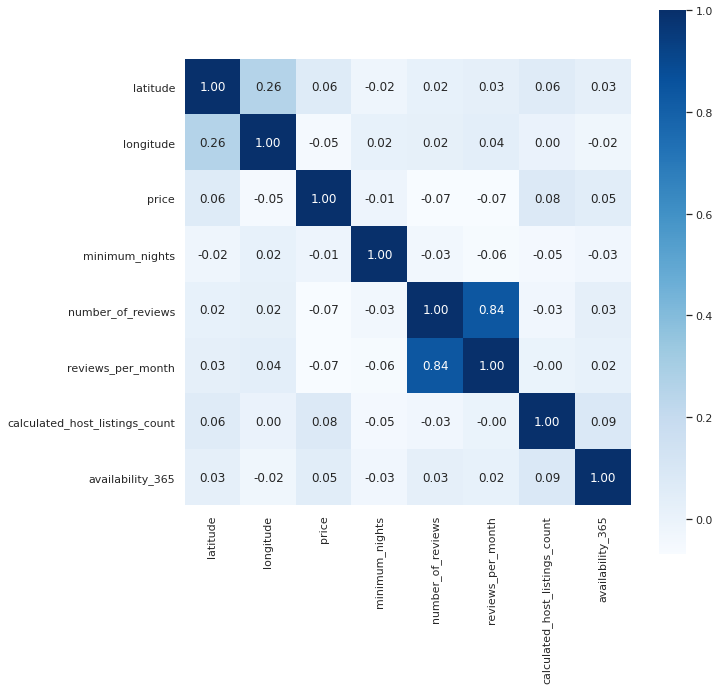

In [82]:
# Criando o heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Blues', fmt='.2f', square=True, linecolor='white', annot=True);

Como podemos ver, as únicas variáveis que apresentam correlação significativa é o número de reviews e reviews por mês, o que faz todo sentido.

### **Q6. Qual a localidade mais cara em Roma?**

Uma maneira de se verificar uma variável em função da outra é usando a função `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [83]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
I Centro Storico              111.334130
XV Cassia/Flaminia             95.057540
XIII Aurelia                   87.362353
IX Eur                         87.276276
II Parioli/Nomentano           81.888653
XII Monte Verde                79.143180
XIV Monte Mario                75.586268
X Ostia/Acilia                 73.820031
VII San Giovanni/Cinecittà     70.612019
VIII Appia Antica              67.416667
Name: price, dtype: float64

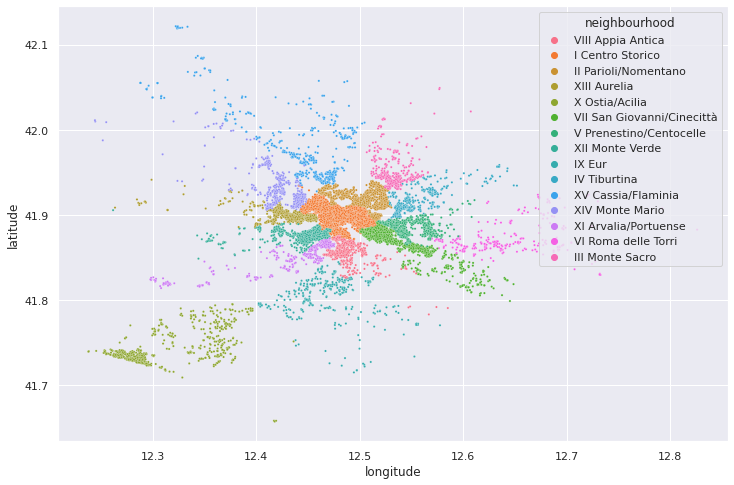

In [84]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood',data=df_clean, s=5.0);

Acima, vemos que o bairro com a média mais cara bairros é p I Centro histórico, o que apresenta sentido uma vez que o centro de Roma é um lugar muito bem localizado e cobiçado por turístas. Vamos ver a quantidade de imóveis que cada bairro apresenta.

In [85]:
df_clean['neighbourhood'].value_counts().sort_values(ascending=False)[:10]

I Centro Storico              14234
VII San Giovanni/Cinecittà     2080
II Parioli/Nomentano           1886
XIII Aurelia                   1700
XII Monte Verde                1327
V Prenestino/Centocelle        1092
VIII Appia Antica               780
X Ostia/Acilia                  639
XIV Monte Mario                 568
IV Tiburtina                    536
Name: neighbourhood, dtype: int64

In [86]:
df_clean['neighbourhood'].value_counts().sort_values(ascending=False)[:10]/df_clean.shape[0]

I Centro Storico              0.529243
VII San Giovanni/Cinecittà    0.077338
II Parioli/Nomentano          0.070125
XIII Aurelia                  0.063209
XII Monte Verde               0.049340
V Prenestino/Centocelle       0.040602
VIII Appia Antica             0.029002
X Ostia/Acilia                0.023759
XIV Monte Mario               0.021119
IV Tiburtina                  0.019929
Name: neighbourhood, dtype: float64

A grande maioria, aproximadamente 53%, dos imóveis disponíveis no Airbnb estão localizados no centro. 

## Análises finais

Após estas análises no nosso conjunto de dados, vamos plotar uma série de imagens que possam descrever nossos dados afim de resumir tudo que descobrimos até agora.

In [87]:
df_clean[['neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights']]

,neighbourhood,latitude,longitude,room_type,price,minimum_nights
0,VIII Appia Antica,41.87218,12.48355,Private room,21,7
1,I Centro Storico,41.88826,12.47002,Private room,37,1
2,I Centro Storico,41.89503,12.49163,Entire home/apt,94,3
3,I Centro Storico,41.89574,12.49058,Entire home/apt,90,2
4,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,73,2
...,...,...,...,...,...,...
28146,I Centro Storico,41.89651,12.47229,Private room,80,1
28147,I Centro Storico,41.89578,12.47084,Private room,105,1
28148,I Centro Storico,41.89795,12.50447,Entire home/apt,175,1
28149,X Ostia/Acilia,41.73864,12.27099,Entire home/apt,68,1


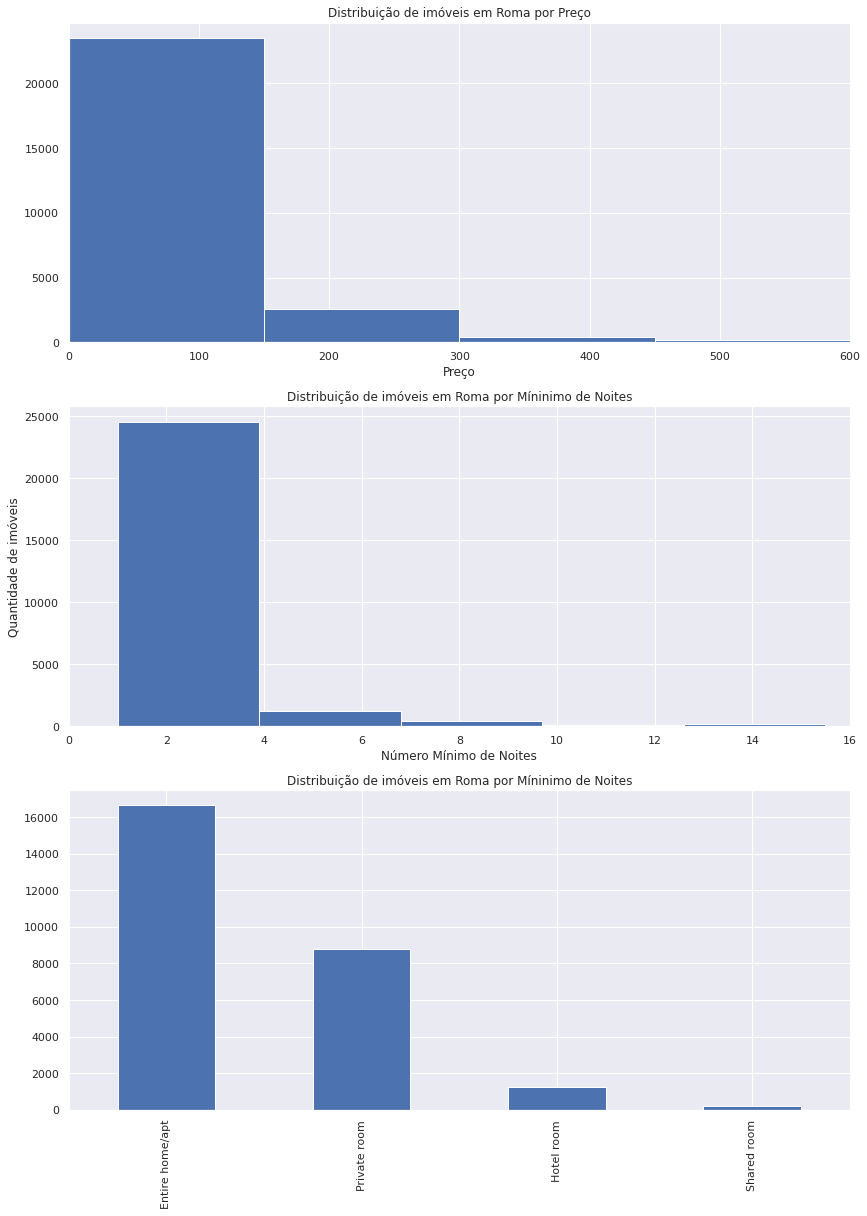

In [88]:
plt.figure(figsize=(14,20))
sns.set(font_scale=1.0)

plt.subplot(3,1,1)
df_clean['price'].plot(kind='hist')
plt.title('Distribuição de imóveis em Roma por Preço')
plt.xlabel('Preço')
plt.ylabel('')
plt.xlim([0,600])

plt.subplot(3,1,2)
df_clean['minimum_nights'].plot(kind='hist')
plt.title('Distribuição de imóveis em Roma por Míninimo de Noites')
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Quantidade de imóveis')
plt.xlim([0,16])

plt.subplot(3,1,3)
df_clean['room_type'].value_counts().plot(kind='bar')
plt.title('Distribuição de imóveis em Roma por Míninimo de Noites')
plt.xlabel('')
plt.ylabel('')


plt.show()

## Conclusões

Neste trabalho realizou-se apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* e valores ausentes em algumas das variáveis. 

Também notou-se que exite uma grande supremecia de imóveis na região do centro de Roma (cerca de 53%) e notou-se que no restante dos bairros exitem poucos imóveis no Airbnb. Podemos observar também que o preço do médio para locação está entre 0 e 150, o que torna um preço acessível a viajantes de todo mundo. Ademais, os tipos mais comuns de imóveis são os apartamento/ casas inteiros ou apenas um cômodo.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Qualquer dúvida ou sugestão é bem vinda.